## T5

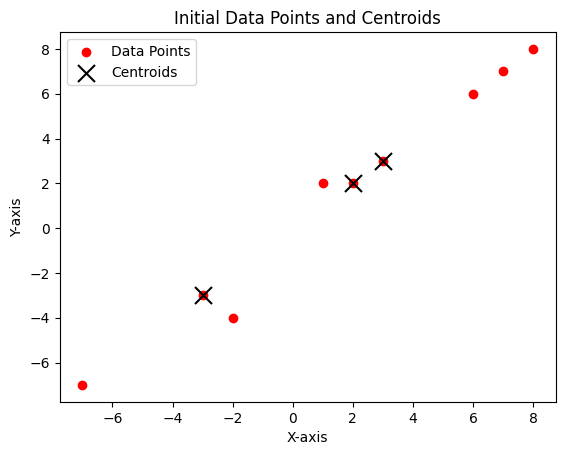

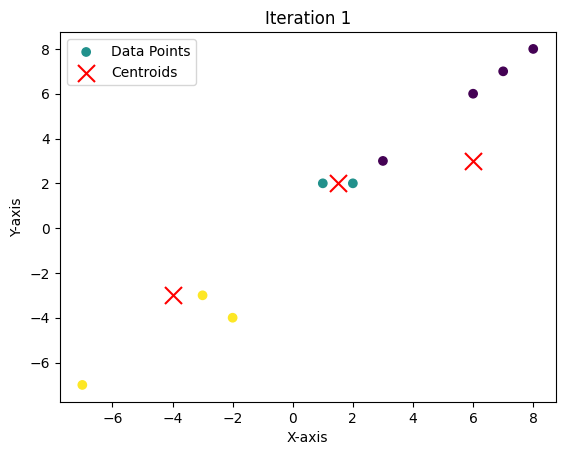

New centroids:  [6. 6.] [1.5 2. ] [-4.         -4.66666667]


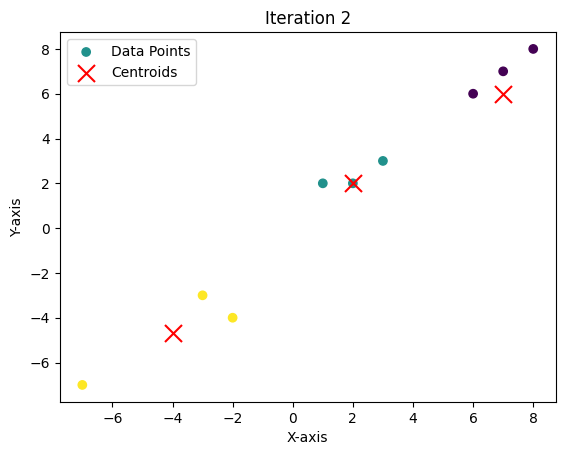

New centroids:  [7. 7.] [2.         2.33333333] [-4.         -4.66666667]


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
init_data_points = np.array([[1, 2], [3, 3], [2, 2], [8, 8], [6, 6], [7, 7], [-3, -3], [-2, -4], [-7, -7]])

# Initial centroids
init_centroids = np.array([[3, 3], [2, 2], [-3, -3]])

# Function to assign points to centroids
def assign_points(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis, :] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Function to update centroids
def update_centroids(data, assignments, k):
    new_centroids = np.array([data[assignments == i].mean(axis=0) for i in range(k)])
    return new_centroids

# K-means clustering
def k_means(data, initial_centroids, max_iterations=100):
    centroids = initial_centroids.copy()
    
    for iteration in range(max_iterations):
        # Assign points to centroids
        assignments = assign_points(data, centroids)
        
        # Update centroids
        new_centroids = update_centroids(data, assignments, len(centroids))

        # Check for breakpoints
        if np.all(centroids == new_centroids):
            break
        
        # Plot current iteration
        plt.scatter(data[:, 0], data[:, 1], c=assignments, cmap='viridis', marker='o', label='Data Points')
        plt.scatter(new_centroids[:, 0], centroids[:, 1], c='red', marker='x', s=150, label='Centroids')
        plt.title(f'Iteration {iteration + 1}')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.legend()
        plt.show()

        print("New centroids: ", new_centroids[0], new_centroids[1], new_centroids[2] )
        
        # Update centroids for the next iteration
        centroids = new_centroids


plt.scatter(init_data_points[:, 0], init_data_points[:, 1], c='red', marker='o', label='Data Points')
plt.scatter(init_centroids[:, 0], init_centroids[:, 1], c='black', marker='x', s=150, label='Centroids')
plt.title(f'Initial Data Points and Centroids')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

k_means(init_data_points, init_centroids)


## T6

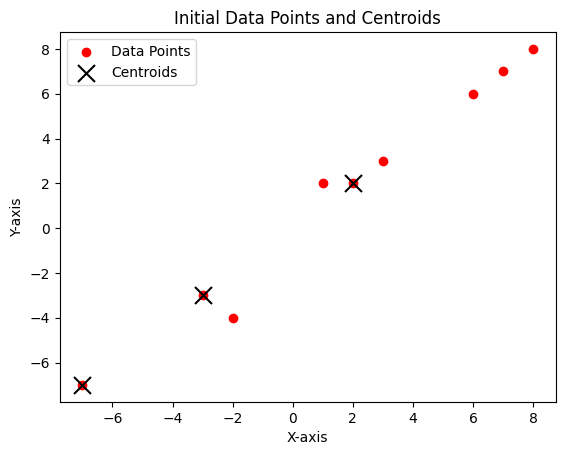

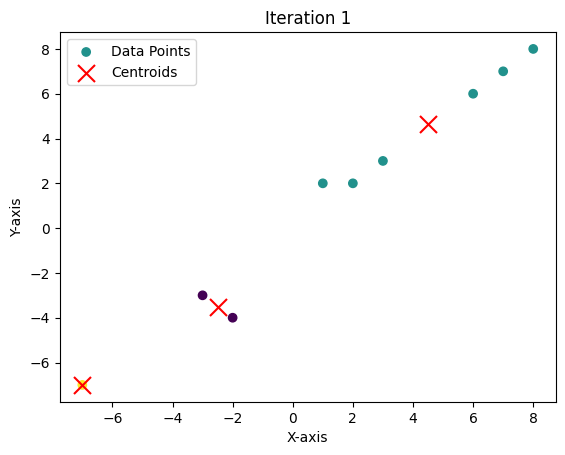

New centroids:  [-2.5 -3.5] [4.5        4.66666667] [-7. -7.]


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
init_data_points = np.array([[1, 2], [3, 3], [2, 2], [8, 8], [6, 6], [7, 7], [-3, -3], [-2, -4], [-7, -7]])

# Initial centroids
init_centroids = np.array([[-3, -3], [2, 2], [-7, -7]])

# Function to assign points to centroids
def assign_points(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis, :] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Function to update centroids
def update_centroids(data, assignments, k):
    new_centroids = np.array([data[assignments == i].mean(axis=0) for i in range(k)])
    return new_centroids

# K-means clustering
def k_means(data, initial_centroids, max_iterations=100):
    centroids = initial_centroids.copy()
    
    for iteration in range(max_iterations):
        # Assign points to centroids
        assignments = assign_points(data, centroids)
        
        # Update centroids
        new_centroids = update_centroids(data, assignments, len(centroids))

        # Check for breakpoints
        if np.all(centroids == new_centroids):
            break
        
        # Plot current iteration
        plt.scatter(data[:, 0], data[:, 1], c=assignments, cmap='viridis', marker='o', label='Data Points')
        plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='red', marker='x', s=150, label='Centroids')
        plt.title(f'Iteration {iteration + 1}')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.legend()
        plt.show()

        print("New centroids: ", new_centroids[0], new_centroids[1], new_centroids[2] )
        
        # Update centroids for the next iteration
        centroids = new_centroids


plt.scatter(init_data_points[:, 0], init_data_points[:, 1], c='red', marker='o', label='Data Points')
plt.scatter(init_centroids[:, 0], init_centroids[:, 1], c='black', marker='x', s=150, label='Centroids')
plt.title(f'Initial Data Points and Centroids')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

k_means(init_data_points, init_centroids)


## OT2

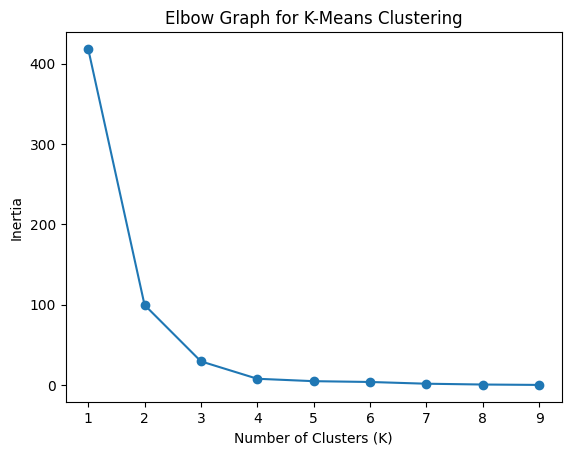

In [21]:
from sklearn.cluster import KMeans

data = np.array([[1, 2], [3, 3], [2, 2], [8, 8], [6, 6], [7, 7], [-3, -3], [-2, -4], [-7, -7]])
max_k = 9

inertia_values = []

for k in range(1, max_k + 1):
    k_means = KMeans(n_clusters=k)
    k_means.fit(data)
    inertia_values.append(k_means.inertia_)

plt.plot(np.arange(1, max_k + 1), inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Graph for K-Means Clustering')
plt.show()

## T8

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url) #training set
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) #test set

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## T8

In [34]:
print(f"The median of 'Age' in the training set is {train['Age'].median()}")

train["Age"] = train["Age"].fillna(train["Age"].median())

The median of 'Age' in the training set is 28.0


## T9

In [35]:
# convert Embarked column to number
train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2

# Fill missing values in Embarked with mode
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])

print(f"The mode of 'Embarked' of the training set is {train['Embarked'].mode()[0]}")

The mode of 'Embarked' of the training set is 0


In [36]:
# convert Sex column to number and fill missing values with mode
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1
train["Sex"] = train["Sex"].fillna(train["Sex"].mode()[0])

## T10

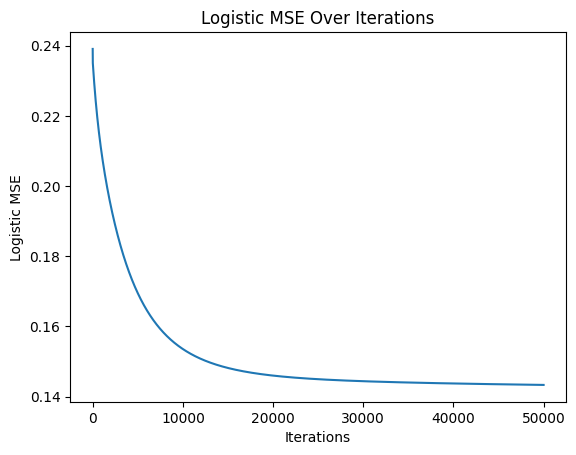

Coefficients: [ 1.06401141 -0.94092065  2.52906073 -0.01964114  0.33219965]


In [110]:
x_train = np.array(train[["Pclass","Sex","Age","Embarked"]].values, dtype = float)
y_train = np.array(train["Survived"], dtype = float)

# Add a column of ones to x (for intercept)
x_train = np.column_stack((np.ones(x_train.shape[0]), x_train))

def logistic(x):
    return 1 / (1 + np.exp(-x))

def prediction(theta, x):
    return np.dot(x, theta)

def mse_logistic(theta, x, y):
    y_pred = logistic(prediction(theta, x))
    mse = np.mean(np.square(y - y_pred))
    return mse

def mse_derived_logistic(theta, x, y):
    m = len(y)
    y_pred = logistic(prediction(theta, x))
    gradient = (2 / m) * np.dot(x.T, y_pred - y)
    return gradient

theta = np.zeros(x_train.shape[1])
mse_history = []

learning_rate = 0.001
iterations = 50000

# Gradient descent
for i in range(iterations):
    gradient = mse_derived_logistic(theta, x_train, y_train)
    theta -= learning_rate * gradient
    mse = mse_logistic(theta, x_train, y_train)
    mse_history.append(mse)

plt.plot(np.arange(iterations), mse_history)
plt.title('Logistic MSE Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Logistic MSE')
plt.show()

print(f'Coefficients: {theta}')

In [111]:
# Evaluate on train dataset (assuming suvival is positive)
y_pred = np.where(logistic(prediction(theta, x_train)) < 0.5, 0, 1)
tp, tn, fp, fn = 0, 0, 0, 0

for i in range(len(y_pred)):
    if y_train[i] == 1:
        if y_pred[i] == 1:
            tp += 1
        else:
            fn += 1
    else:
        if y_pred[i] == 1:
            fp += 1
        else:
            tn += 1
print(f'Accuracy = {(tp + tn) / len(y_pred)}')
print(f'F1 = {(2 * tp / (2 * tp + fp + fn))}')

Accuracy = 0.7968574635241302
F1 = 0.7228177641653905


## T11

### Evaluate on test dataset

In [80]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418.0,332.000000,418.000000,418.000000,418,417.000000,91,418.0
unique,NaN,NaN,418,2.0,NaN,NaN,NaN,363,NaN,76,3.0
top,NaN,NaN,"Kelly, Mr. James",0.0,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,0.0
freq,NaN,NaN,1,266.0,NaN,NaN,NaN,5,NaN,3,270.0
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


No null in test dataset

In [82]:
test.loc[test["Embarked"] == "S", "Embarked"] = 0
test.loc[test["Embarked"] == "C", "Embarked"] = 1
test.loc[test["Embarked"] == "Q", "Embarked"] = 2
test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

In [112]:
x_test = np.array(test[["Pclass","Sex","Age","Embarked"]].values, dtype = float)
x_test = np.column_stack((np.ones(x_test.shape[0]), x_test))

In [113]:
res = np.where(logistic(prediction(theta, x_test)) < 0.5, 0, 1)
df = test["PassengerId"].to_frame()
df_predicted = df.assign(Survived = res)
df_predicted.to_csv('titanic-normal-logistic-regression.csv', index = False)

## T12

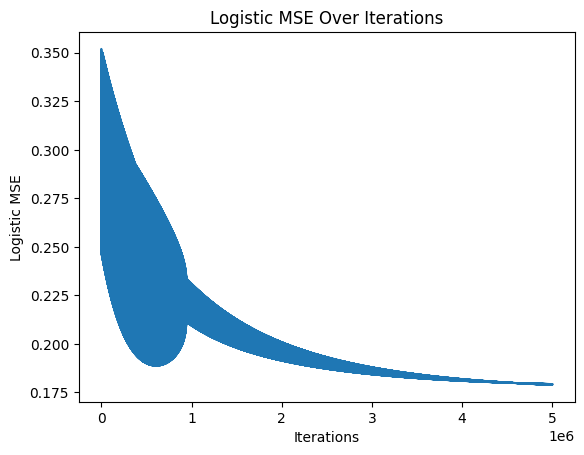

Coefficients: [ 5.04019098e-01  1.58410231e+00 -1.21457418e-04 -3.74854202e-02
 -1.05141490e+00  1.58410231e+00  3.24066427e-02  3.58622867e-01]


In [97]:
x_train_2 = np.array(train[["Pclass","Sex","Age","Embarked"]].values, dtype = float)
x_train_2 = np.column_stack((np.square(x_train_2[:,1:]), x_train_2)) # Add x1^2, x2^2, x3^2, x4^2, ...
x_train_2 = np.column_stack((np.ones(x_train_2.shape[0]), x_train_2)) # Add 0 degree
# x_train_2 = np.hstack((x_train, x_train[:,1:]**2))
theta_2 = np.zeros(x_train_2.shape[1])
mse_history_2 = []

learning_rate_2 = 0.000005
iterations_2 = 5000000

# Gradient descent
for i in range(iterations_2):
    gradient = mse_derived_logistic(theta_2, x_train_2, y_train)
    theta_2 -= learning_rate_2 * gradient
    mse = mse_logistic(theta_2, x_train_2, y_train)
    mse_history_2.append(mse)

plt.plot(np.arange(iterations_2), mse_history_2)
plt.title('Logistic MSE Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Logistic MSE')
plt.show()

print(f'Coefficients: {theta_2}')

In [114]:
# Evaluate on train dataset (assuming suvival is positive)
y_pred_2 = np.where(logistic(prediction(theta_2, x_train_2)) < 0.5, 0, 1)
tp, tn, fp, fn = 0, 0, 0, 0

for i in range(len(y_pred_2)):
    if y_train[i] == 1:
        if y_pred_2[i] == 1:
            tp += 1
        else:
            fn += 1
    else:
        if y_pred_2[i] == 1:
            fp += 1
        else:
            tn += 1
print(f'Accuracy = {(tp + tn) / len(y_pred_2)}')
print(f'F1 = {(2 * tp / (2 * tp + fp + fn))}')

Accuracy = 0.7441077441077442
F1 = 0.7069408740359897


In [115]:
x_test_2 = np.array(test[["Pclass","Sex","Age","Embarked"]].values, dtype = float)
x_test_2 = np.column_stack((np.square(x_test_2[:,1:]), x_test_2))
x_test_2 = np.column_stack((np.ones(x_test_2.shape[0]), x_test_2))

res = np.where(logistic(prediction(theta_2, x_test_2)) < 0.5, 0, 1)
df = test["PassengerId"].to_frame()
df_predicted = df.assign(Survived = res)
df_predicted.to_csv('titanic-high-order.csv', index = False)

## T13

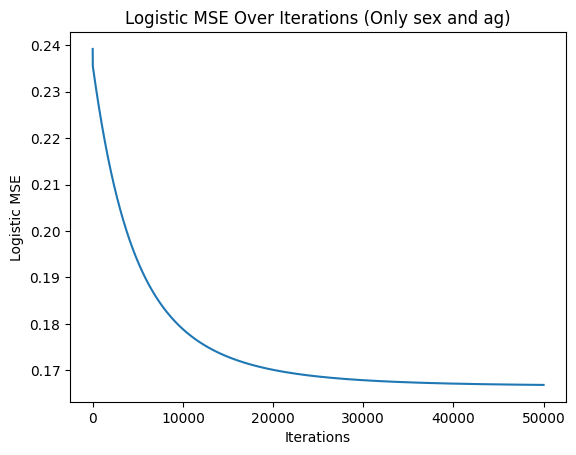

Coefficients: [-1.11632503  2.39889333 -0.00926881]


In [107]:
x_train_3 = np.array(train[["Sex","Age"]].values, dtype = float) # Only sex and age
x_train_3 = np.column_stack((np.ones(x_train_3.shape[0]), x_train_3))
theta_3 = np.zeros(x_train_3.shape[1])
mse_history_3 = []

learning_rate_3 = 0.001
iterations_3 = 50000

# Gradient descent
for i in range(iterations_3):
    gradient = mse_derived_logistic(theta_3, x_train_3, y_train)
    theta_3 -= learning_rate_3 * gradient
    mse = mse_logistic(theta_3, x_train_3, y_train)
    mse_history_3.append(mse)

plt.plot(np.arange(iterations_3), mse_history_3)
plt.title('Logistic MSE Over Iterations (Only sex and ag)')
plt.xlabel('Iterations')
plt.ylabel('Logistic MSE')
plt.show()

print(f'Coefficients: {theta_3}')

In [108]:
# Evaluate on train dataset (assuming suvival is positive)
y_pred_3 = np.where(logistic(prediction(theta_3, x_train_3)) < 0.5, 0, 1)
tp, tn, fp, fn = 0, 0, 0, 0

for i in range(len(y_pred_3)):
    if y_train[i] == 1:
        if y_pred_3[i] == 1:
            tp += 1
        else:
            fn += 1
    else:
        if y_pred_3[i] == 1:
            fp += 1
        else:
            tn += 1
print(f'Accuracy = {(tp + tn) / len(y_pred_3)}')
print(f'F1 = {(2 * tp / (2 * tp + fp + fn))}')

Accuracy = 0.7867564534231201
F1 = 0.7103658536585366


In [109]:
x_test_3 = np.array(test[["Sex","Age"]].values, dtype = float)
x_test_3 = np.column_stack((np.ones(x_test_3.shape[0]), x_test_3))

res = np.where(logistic(prediction(theta_3, x_test_3)) < 0.5, 0, 1)
df = test["PassengerId"].to_frame()
df_predicted = df.assign(Survived = res)
df_predicted.to_csv('titanic-sex-age.csv', index = False)